In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

import main_urnings as mu

In [20]:
#game settings
n_player = 1000
n_items = 1000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 10000
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.2, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = item_true_values[i] * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [21]:
adaptive_sim.play(n_games=n_sim, test = True)

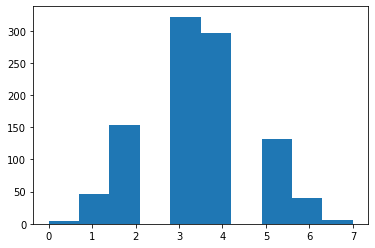

In [23]:
urnings_matrix = np.zeros((n_player, n_sim))

for pl in range(n_player):
    row = players[pl].container[1:]
    urnings_matrix[pl,:] = row

plt.hist(urnings_matrix[:,8])

np.savetxt("urnings_matrix.csv", urnings_matrix, delimiter=",")